In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/PlayTennis.csv")
dataset

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


**Summary of the dataset**

In [ ]:
dataset=dataset.rename(columns={
    "play":"PlayTennis"
})

In [ ]:
print("no.of rows and columns in the dataset",dataset.shape)
print("columns of the dataset: ",list(dataset.columns))
print(dataset.info())

no.of rows and columns in the dataset (14, 6)
columns of the dataset:  ['day', 'outlook', 'temp', 'humidity', 'wind', 'PlayTennis']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   day         14 non-null     object
 1   outlook     14 non-null     object
 2   temp        14 non-null     object
 3   humidity    14 non-null     object
 4   wind        14 non-null     object
 5   PlayTennis  14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes
None


In [ ]:
print(dataset.describe())

       day outlook  temp humidity  wind PlayTennis
count   14      14    14       14    14         14
unique  14       3     3        2     2          2
top     D1   Sunny  Mild     High  Weak        Yes
freq     1       5     6        7     8          9


## **bar charts of the data**

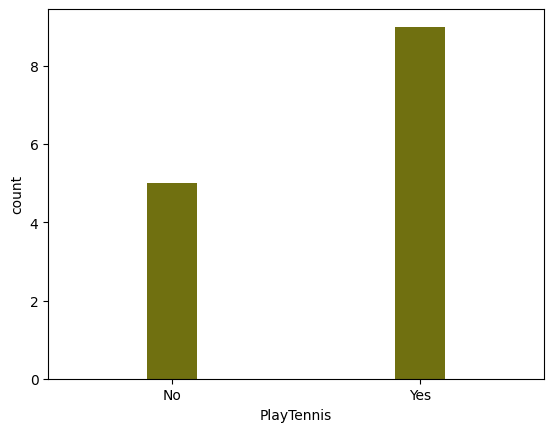

In [ ]:
#PlayTennisTennis column
sns.countplot(data=dataset,x="PlayTennis",color='olive',width=0.2)
plt.show()

PlayTennis  No  Yes
outlook            
Overcast     0    4
Rain         2    3
Sunny        3    2


/tmp/ipython-input-1654553961.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(data=dataset,x="outlook",color='olive',width=0.4,hue='PlayTennis')


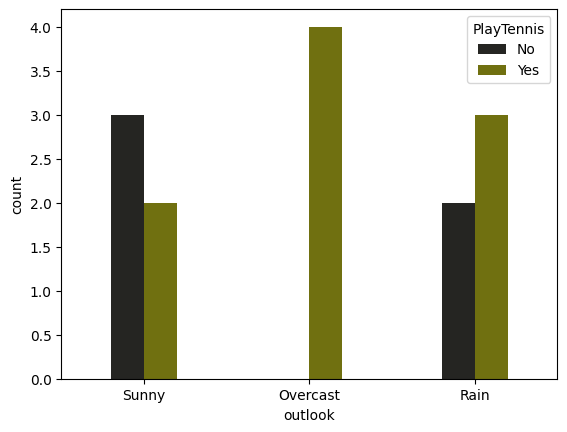

In [ ]:
print(pd.crosstab(dataset["outlook"],dataset["PlayTennis"]))
sns.countplot(data=dataset,x="outlook",color='olive',width=0.4,hue='PlayTennis')
plt.show()

PlayTennis  No  Yes
temp               
Cool         1    3
Hot          2    2
Mild         2    4


/tmp/ipython-input-3387578640.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(data=dataset,x="temp",color='olive',width=0.2,hue='PlayTennis')


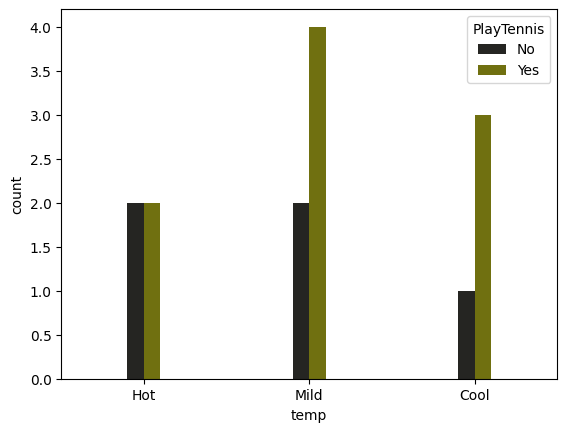

In [ ]:
print(pd.crosstab(dataset["temp"],dataset["PlayTennis"]))
sns.countplot(data=dataset,x="temp",color='olive',width=0.2,hue='PlayTennis')
plt.show()

In [ ]:
dataset

,day,outlook,temp,humidity,wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


PlayTennis  No  Yes
humidity           
High         4    3
Normal       1    6


/tmp/ipython-input-1079205592.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(data=dataset,x="humidity",color='olive',width=0.2,hue='PlayTennis')


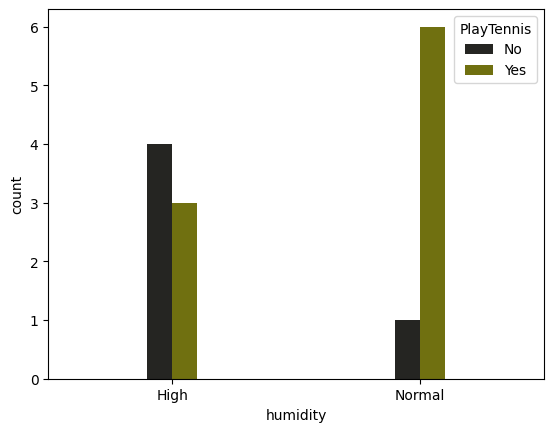

In [ ]:
print(pd.crosstab(dataset["humidity"],dataset["PlayTennis"]))
sns.countplot(data=dataset,x="humidity",color='olive',width=0.2,hue='PlayTennis')
plt.show()

PlayTennis  No  Yes
wind               
Strong       3    3
Weak         2    6


/tmp/ipython-input-3434514733.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(data=dataset,x="wind",color='olive',width=0.2,hue='PlayTennis')


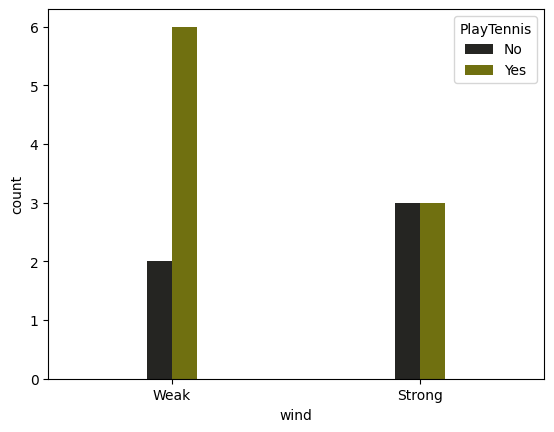

In [ ]:
print(pd.crosstab(dataset["wind"],dataset["PlayTennis"]))
sns.countplot(data=dataset,x="wind",color='olive',width=0.2,hue='PlayTennis')
plt.show()

######**Consider the conditions Outlook=Sunny and Temperature=Hot and humidity=High and wind=Strong.predict whether the it is better to PlayTennis tennis or not???**

In [ ]:
#probability of PlayTennising tennis given conditions Outlook=Sunny and Temperature=Hot and humidity=High and wind=Strong is given by
#P(YES/sunny,hot,high,strong) directly proportional to p(sunny,hot,high,strong/YES)*P(Yes) this can be written as p(sunny/yes)*p(hot/yes)*p(high/yes)*p(strong/yes)
#calculating the conditional probabilities

In [ ]:
#P(sunny/yes)
p_yes=dataset["PlayTennis"].value_counts()["Yes"]/dataset.shape[0]
print("P(yes):",p_yes)
print(pd.crosstab(dataset["outlook"],dataset["PlayTennis"]))
p_sunny_yes=pd.crosstab(dataset["outlook"],dataset["PlayTennis"]).loc["Sunny","Yes"]/dataset["PlayTennis"].value_counts()["Yes"]
p_sunny_no=pd.crosstab(dataset["outlook"],dataset["PlayTennis"]).loc["Sunny","No"]/dataset["PlayTennis"].value_counts()["No"]
print("P(sunny/yes):",p_sunny_yes)
print("P(sunny/no):",p_sunny_no)

P(yes): 0.6428571428571429
PlayTennis  No  Yes
outlook            
Overcast     0    4
Rain         2    3
Sunny        3    2
P(sunny/yes): 0.2222222222222222
P(sunny/no): 0.6


In [ ]:
#P(hot/yes)
print(pd.crosstab(dataset["temp"],dataset["PlayTennis"]))
p_hot_yes=pd.crosstab(dataset["temp"],dataset["PlayTennis"]).loc["Hot","Yes"]/dataset["PlayTennis"].value_counts()["Yes"]
p_hot_no=pd.crosstab(dataset["temp"],dataset["PlayTennis"]).loc["Hot","No"]/dataset["PlayTennis"].value_counts()["No"]
print("P(Hot/yes):",p_hot_yes)
print("P(Hot/no):",p_hot_no)

PlayTennis  No  Yes
temp               
Cool         1    3
Hot          2    2
Mild         2    4
P(Hot/yes): 0.2222222222222222
P(Hot/no): 0.4


In [ ]:
#P(High/yes)
print(pd.crosstab(dataset["humidity"],dataset["PlayTennis"]))
p_high_yes=pd.crosstab(dataset["humidity"],dataset["PlayTennis"]).loc["High","Yes"]/dataset["PlayTennis"].value_counts()["Yes"]
p_high_no=pd.crosstab(dataset["humidity"],dataset["PlayTennis"]).loc["High","No"]/dataset["PlayTennis"].value_counts()["No"]
print("P(High/yes):",p_hot_yes)
print("P(High/no):",p_hot_no)

PlayTennis  No  Yes
humidity           
High         4    3
Normal       1    6
P(High/yes): 0.2222222222222222
P(High/no): 0.4


In [ ]:
#P(Strong/yes)
print(pd.crosstab(dataset["wind"],dataset["PlayTennis"]))
p_strong_yes=pd.crosstab(dataset["wind"],dataset["PlayTennis"]).loc["Strong","Yes"]/dataset["PlayTennis"].value_counts()["Yes"]
p_strong_no=pd.crosstab(dataset["wind"],dataset["PlayTennis"]).loc["Strong","No"]/dataset["PlayTennis"].value_counts()["No"]
print("P(Strong/yes):",p_hot_yes)
print("P(Strong/no):",p_hot_no)

PlayTennis  No  Yes
wind               
Strong       3    3
Weak         2    6
P(Strong/yes): 0.2222222222222222
P(Strong/no): 0.4


In [ ]:
p_total_yes=p_sunny_yes*p_hot_yes*p_high_yes*p_strong_yes*p_yes
p_no=p_sunny_no*p_hot_no*p_high_no*p_strong_no*(1-p_yes)
print("P(YES/sunny,hot,high,strong):",p_total_yes)
print("P(No/sunny,hot,high,strong): ",p_no)
print(max(p_total_yes,p_no))

P(YES/sunny,hot,high,strong): 0.0035273368606701934
P(No/sunny,hot,high,strong):  0.041142857142857134
0.041142857142857134


In [ ]:
#implementing the naive bayes algorithm from scratch
class CategoricalNaiveBayes:
  def __init__(self):
    self.class_probabilities={}
    self.feature_classes=[]
    self.conditional_probabilities={}
    self.classes=[]
  def fit(self,X,y):
    #iterate through all the classes and calculate the class probabilities(Pck)
    for i in np.unique(y):
      self.classes.append(i)
      self.class_probabilities[i]=(y[y==i].shape[0])/(y.shape[0])
    #calculating all the conditional probabilities P(X/ck)
    for i in X.columns:
      self.feature_classes.append(np.unique(X[i]))
    for i in self.classes:
      for j in range(len(X.columns)):
        for k in self.feature_classes[j]:
          temp=X.iloc[:,j]
          prob_a_and_b=len(temp[(y==i)&(temp==k)])/len(y[y==i])
          prob_b=self.class_probabilities[i]
          self.conditional_probabilities[(i,j,k)]=prob_a_and_b/prob_b
  def predict(self,X):
    y_pred=[]
    for i in range(X.shape[0]):
      row_tuple=X.iloc[i,:]
      max_prob=0
      max_prob_class=None
      for j in self.classes:
        prob=1
        for k in range(len(list(row_tuple))):
          prob*=self.conditional_probabilities[(j,k,row_tuple[k])]
        prob*=self.class_probabilities[j]
        if(prob>max_prob):
          max_prob=prob
          max_prob_class=j
      y_pred.append(max_prob_class)
    return y_pred

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Correcting the target variable 'y' to 'PlayTennis' (column 5)
# And correcting features X to exclude 'day' (column 0) and include 'wind' (column 4)
X_train,X_test,y_train,y_test=train_test_split(dataset.iloc[:,1:5],dataset.iloc[:,5],random_state=42,test_size=0.4)
nb=CategoricalNaiveBayes()
nb.fit(X_train,y_train)
accuracy_score(y_test,nb.predict(X_test))

/tmp/ipython-input-380370103.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob*=self.conditional_probabilities[(j,k,row_tuple[k])]


0.8333333333333334

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
# Encode categorical features as integers for CategoricalNB
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train).toarray()  # Encode and convert to dense array
X_test_encoded = encoder.transform(X_test).toarray()  # Only transform the test data
# Initialize and train Naive Bayes classifier
nb = CategoricalNB()
nb.fit(X_train_encoded, y_train)
# Make predictions
predicted = nb.predict(X_test_encoded)
# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, predicted):.2f}")
print("y_test:", y_test)
print("Predicted:", predicted)

Accuracy: 0.67
y_test: 9     Yes
11    Yes
0      No
12    Yes
5      No
8     Yes
Name: PlayTennis, dtype: object
Predicted: ['Yes' 'No' 'No' 'Yes' 'Yes' 'Yes']


In [ ]:
class GaussianNaiveBayes:
  def __init__(self):
    self.class_probabilities={}
    self.feature_means={}
    self.feature_variance={}
    self.conditional_probabilities={}
    self.classes=[]
  def gaussianProbability(self,x,mean,variance):
    return (1/np.sqrt(2*np.pi*variance))*np.exp(-((x-mean)**2)/(2*variance))
  def fit(self,X,y):
    for i in np.unique(y):
      self.classes.append(i)
      self.class_probabilities[i]=(y[y==i].shape[0])/(y.shape[0])
    #calculating the means and variances of the each of the unique features in the dataset
    #calculating the mean and variance of the features groupby the classes present in the dataset
    for i in range(len(X.columns)):
      for j in self.classes:
        self.feature_means[(i,j)]=X[X.columns[i]][y==j].mean()
        self.feature_variance[(i,j)]=X[X.columns[i]][y==j].var()
  def predict(self,X):
    #predicting the classes bases on the probabilities
    y_pred=[]
    for i in range(X.shape[0]):
      row_tuple=X.iloc[i,:]
      max_prob=0
      max_prob_class=None
      for j in self.classes:
        prob=1
        for k in range(len(list(row_tuple))):
          prob*=self.gaussianProbability(row_tuple[k],self.feature_means[(k,j)],self.feature_variance[(k,j)])
        prob*=self.class_probabilities[j]
        if(prob>max_prob):
          max_prob=prob
          max_prob_class=j
      y_pred.append(max_prob_class)
    return y_pred

In [ ]:
data=pd.read_csv("/content/diabetes.csv")
X=data.iloc[:,:len(data.columns)-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:len(data.columns)-1],data.iloc[:,-1],random_state=42,test_size=0.4)
nb=GaussianNaiveBayes()
nb.fit(X_train,y_train)
ypred=nb.predict(X_test)
accuracy_score(y_test,ypred)

/tmp/ipython-input-1201843365.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob*=self.gaussianProbability(row_tuple[k],self.feature_means[(k,j)],self.feature_variance[(k,j)])


0.7597402597402597

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("accuracy",accuracy_score(y_test, predictions))

accuracy 0.7597402597402597
